<a href="https://colab.research.google.com/github/alitourani/deep-learning-from-scratch/blob/main/Codes/CNNs/4_ImageClassificationCIFAR10_Complex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification on CIFAR-10 (More Complex CNN)**

🎯 **Goal:** The main goal of this application is to build a model that classifies images from give images

🗄️ **Dataset:** [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class

**I. Import Libraries**

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

**II. Prepare Data**

In [2]:
# Get the dataset
dataset = datasets.cifar10
# Separate train and test samples
(xTrain, yTrain), (xTest, yTest) = dataset.load_data()
# Pre-processing: normalizing data
xTrain, xTest = xTrain / 255.0, xTest / 255.0
# Now, check the outputs
print('Train data shape:', xTrain.shape)
print('Test data shape:', xTest.shape)
print('Train labels shape:', yTrain.shape)
print('Test labels shape:', yTest.shape)

170508288/170498071 [==============================] - 2s 0us/step
Train data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Train labels shape: (50000, 1)
Test labels shape: (10000, 1)


**III. Check Some of Data Instances**

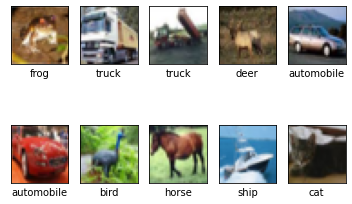

In [3]:
# What classes do we need?
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
           'frog', 'horse', 'ship', 'truck']

for index in range(len(classes)):
  plt.subplot(2, 5, index+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xTrain[index])
  plt.xlabel(classes[yTrain[index][0]])
plt.show()

**IV. Create the Model**

In [6]:
# Model
model = models.Sequential()
# output filters (activation maps): 32, filter size: 3*3, stride: 1, no padding
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 16)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

**V. Training and Evaluation**

In [7]:
# For each sample, we have a vector of logits
predictions = model(xTrain[:1]).numpy()
predictions

# Now, converting these values into probabilities using SoftMax
tf.nn.softmax(predictions).numpy()

array([[0.08957779, 0.10991262, 0.10787696, 0.09252112, 0.09375311,
        0.09098002, 0.11949103, 0.12666783, 0.08364867, 0.08557087]],
      dtype=float32)

In [8]:
# Loss function and optimizer
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss(yTrain[:1], predictions).numpy()
# The loss function is going to show negative probability, it would be close to 2.4 (tf.math.log(1/10))

2.124514

In [9]:
# Adam optimizer
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
# Start training
history = model.fit(xTrain, yTrain, epochs=10, validation_data=(xTest, yTest))

Epoch 1/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.4762 - accuracy: 0.4621 - val_loss: 1.2196 - val_accuracy: 0.5580
Epoch 2/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.1671 - accuracy: 0.5886 - val_loss: 1.1091 - val_accuracy: 0.6194
Epoch 3/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.0226 - accuracy: 0.6427 - val_loss: 1.0075 - val_accuracy: 0.6524
Epoch 4/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.9424 - accuracy: 0.6691 - val_loss: 1.0153 - val_accuracy: 0.6535
Epoch 5/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.8893 - accuracy: 0.6902 - val_loss: 0.9972 - val_accuracy: 0.6627
Epoch 6/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.8465 - accuracy: 0.7036 - val_loss: 0.9566 - val_accuracy: 0.6766
Epoch 7/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.8123 - accuracy: 0.7153 - val_loss: 0.9547 -

In [10]:
# Accuracy on the testing data (the previous cell was for trainig data validation)
testLoss, testAcc = model.evaluate(xTest, yTest, verbose=2)
print('Accuracy:', testAcc)

313/313 - 4s - loss: 0.9480 - accuracy: 0.6854 - 4s/epoch - 12ms/step
Accuracy: 0.6854000091552734


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'lower weight'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


313/313 - 4s - loss: 0.9480 - accuracy: 0.6854 - 4s/epoch - 12ms/step


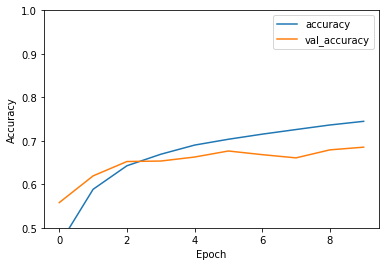

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.legend(loc='lower weight')

testLoss, testAcc = model.evaluate(xTest, yTest, verbose=2)

**VI. Prediction**

In [12]:
# Make some predictions
# Returning probability by wrapping the model in a softmax layer
probabilityModel = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
prediction = probabilityModel.predict(xTest[:10]) # Testing the first 10 images
prediction[0]

array([1.2653054e-03, 3.2042968e-04, 1.9825676e-02, 8.0343920e-01,
       3.3897709e-03, 1.1545237e-01, 1.2747965e-02, 4.8020240e-03,
       1.3394350e-02, 2.5363034e-02], dtype=float32)

In [13]:
# Applying a lablel and compare with the test label
print('Predicted labels:', np.argmax(prediction, axis=1))
print('Original labels:', yTest[:10].flatten())

Predicted labels: [3 8 8 0 4 6 1 6 3 9]
Original labels: [3 8 8 0 6 6 1 6 3 1]


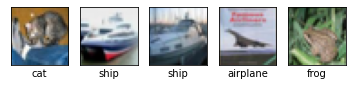

In [14]:
# Plot the first five images
for index in range(5):
  plt.subplot(1, 5, index+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xTest[index])
  plt.xlabel(classes[yTest[index][0]])
plt.show()

(3, 3, 3, 32)


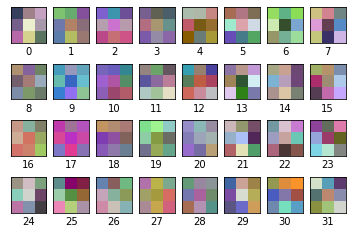

In [18]:
# What are the learned parameters
filters, biases = model.layers[0].get_weights() # layer0 weights
filterMin, filterMax = filters.min(), filters.max()
filters = (filters - filterMin) / (filterMax - filterMin)
print(filters.shape)

# Plot the 10 filters
numberOfFilters = 32
for index in range(numberOfFilters):
  filter = filters[:, :, :, index]
  plt.subplot(4, 8, index+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(index)
  plt.imshow(filter)
plt.show()

# We can see learned filters in the first Conv network

In [19]:
# What are the learned parameters
filters, biases = model.layers[2].get_weights() # Second Conv layer weights
# Note: We cannot have layers[1].get_weights(), as it throws error because it refers to MaxPooling layer
filterMin, filterMax = filters.min(), filters.max()
filters = (filters - filterMin) / (filterMax - filterMin)
print(filters.shape)

# Note: (3, 3, 32, 32) is too complicate to be drawn as an image

(3, 3, 32, 32)
